In [34]:
import tensorflow as tf
import pandas as pd
from keras.datasets import mnist
from matplotlib import pyplot as plt
plt.gray()
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

Load data and view a sample image

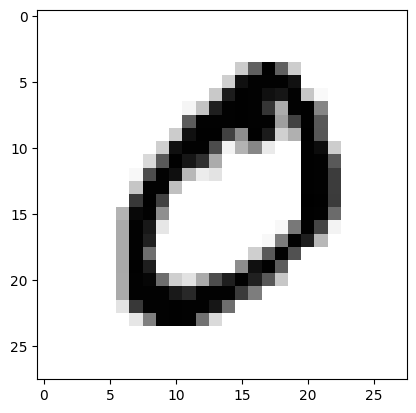

In [60]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()  # load mnist data and split from keras datasets
plt.imshow(X_train[1]) # quick view that data looks correct, each image is 28x28 pixels

In [44]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # explicitly reshape to have 1 channel, MNIST data already does, but this avoids confusion for training models later on
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [45]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [48]:
y_train = np_utils.to_categorical(Y_train, 10)
y_test = np_utils.to_categorical(Y_test, 10)

Optimal model - Convolution 2D - CS231n class

In [130]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(rate=0.5),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
    batch_size=32, epochs=10, verbose=1
)

Epoch 1/10
1875/1875 [==============================] - 56s 29ms/step - loss: 0.5120 - accuracy: 0.8903
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1452 - accuracy: 0.9575
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1163 - accuracy: 0.9657
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0919 - accuracy: 0.9729
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0866 - accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0763 - accuracy: 0.9773
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0737 - accuracy: 0.9782
Epoch 8/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0686 - accuracy: 0.9807
Epoch 9/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0628 - accuracy: 0.9820
Epoch 10/10
1875/1875 [==============================] - 50s 27m

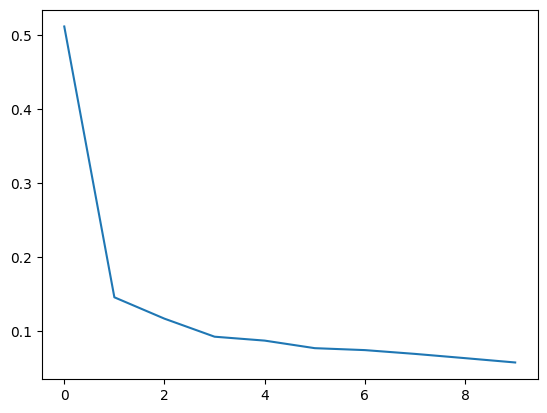

In [135]:
plt.plot(history.history['loss'])

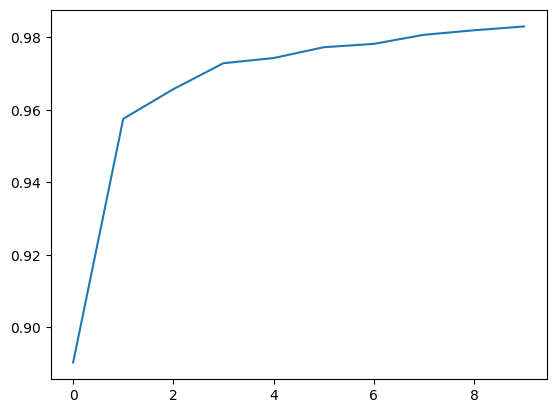

In [132]:
plt.plot(history.history['accuracy'])

In [107]:
X_train.shape

(60000, 28, 28)

In [120]:
test_image = X_train[5]
to_predict = test_image.reshape(1, 28, 28)

1/1 [==============================] - 0s 26ms/step
Model predicts that this is a: 2


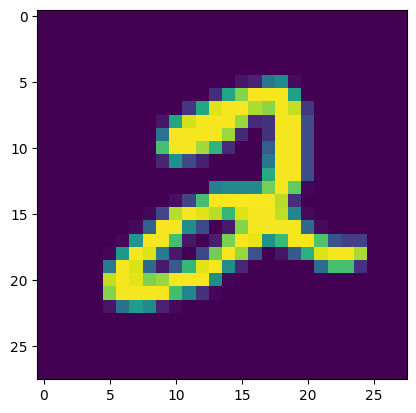

In [121]:
print("Model predicts that this is a:", model.predict(to_predict).argmax())
plt.imshow(test_image)

In [129]:
model.history.history.keys()

dict_keys([])

In [103]:
results.argmax()

5

In [94]:
pd.DataFrame(results[2]).idxmax()

0    4
dtype: int64

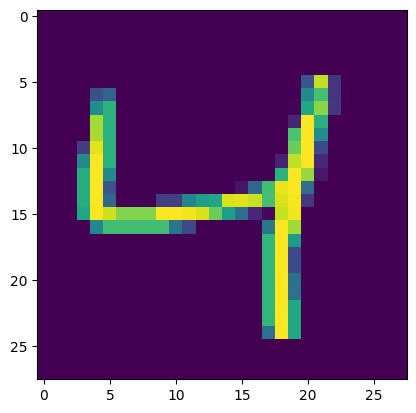

In [95]:
plt.imshow(X_train[2])